In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Load CSV file into the df
crypto_df = pd.read_csv('Resources/crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


### Data Preparation

In [3]:
# EDA
crypto_df.shape

(1252, 7)

In [4]:
crypto_df.value_counts()

Unnamed: 0  CoinName     Algorithm    IsTrading  ProofType  TotalCoinsMined  TotalCoinSupply
1337        EliteCoin    X13          True       PoW/PoS    2.927942e+10     314159265359       1
POKER       PokerCoin    Scrypt       False      PoS/PoW    0.000000e+00     466666667          1
PKB         ParkByte     SHA-256      True       PoW/PoS    0.000000e+00     25000000           1
PLNC        PLNCoin      Scrypt       True       PoW/PoS    1.708960e+07     38540000           1
PLTC        PlatinCoin   CryptoNight  True       PoW        8.430000e+04     600000518          1
                                                                                               ..
FAIR        FairCoin     Groestl      True       PoW/PoS    5.319383e+07     0                  1
FC2         Fuel2Coin    X11          True       PoS        0.000000e+00     100000000          1
FCN         FantomCoin   CryptoNight  True       PoW        0.000000e+00     18400000           1
FIBRE       FIBRE        

In [5]:
# Filter for currencies that are currently being traded
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
# Drop [IsTrading] column
crypto_df = crypto_df.drop(columns ='IsTrading')

In [7]:
# Check null values
crypto_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [8]:
# Remove rows with null values
crypto_df = crypto_df.dropna()

In [9]:
# Verify nulls are dropped
crypto_df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [10]:
# Filter for cryptocurrencies that have been mined
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
# Since the coin names do not contribute to the analysis of the data, 
# delete the CoinName from the dataframe.
crypto_df.drop(columns='CoinName', axis=1, inplace= True)
crypto_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [13]:
# Drop Unamed:0 columns
crypto_df = crypto_df.drop(columns=['Unnamed: 0'])
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [14]:
# convert Algorithm and ProofType into numerical data
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# View column names 
X.columns

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

In [16]:
# Standarize dataset
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)

In [17]:
# Number of features in datast
len(X.columns)

98

### Dimensionality Reduction

#### PCA

In [18]:
## Applying PCA to reduce dimensions from 98 to 4
# Initialize model 
pca = PCA(n_components=4)

# Get three principal components for the crypto data.
crypto_pca = pca.fit_transform(crypto_scaled)

In [19]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(data=crypto_pca, 
                             columns=["PC 1", "PC 2", "PC 3", "PC4"])
df_crypto_pca.head()

,PC 1,PC 2,PC 3,PC4
0,-0.335338,1.021250,-0.542796,0.016231
1,-0.318675,1.021403,-0.543074,0.016334
2,2.306864,1.658602,-0.615561,0.085051
3,-0.143791,-1.314556,0.170963,0.019068
4,-0.147470,-2.006187,0.294303,0.001207


In [20]:
# Fetch explained variance
pca.explained_variance_ratio_

array([0.02793111, 0.02139618, 0.02049074, 0.02043836])

According to the explained variance, each principal component contains approximately ~.02% of the variance. With only four features, we have a very small amount of the information in the original dataset. We will need to increase the number of principal components to increase the explained variance. 

In [21]:
# Preserve 90% of the explained variance in dimensionality reduction using PCA
pca = PCA(n_components=.90)

# Get three principal components for the crypto data.
crypto_pca = pca.fit_transform(crypto_scaled)

In [22]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(data=crypto_pca)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,8.903525e-15,3.715567e-12,-1.716189e-14,-0.007129,-1.319756,-0.051813,...,-2.210782e-16,-6.883168e-16,2.282140e-15,-3.661557e-15,1.430694e-15,5.554638e-16,-1.785268e-15,-4.465325e-15,5.623435e-15,1.495080e-16
1,-0.318434,1.032331,-0.591126,0.001386,8.797456e-15,3.685202e-12,-1.704862e-14,-0.007739,-1.322514,-0.056674,...,7.921450e-17,-1.120989e-15,2.525930e-15,-3.381113e-15,1.239842e-15,6.577914e-16,-2.151362e-15,-3.636457e-15,5.253594e-15,2.257183e-16
2,2.305468,1.656383,-0.683617,0.004731,1.292867e-14,1.259214e-11,-2.400344e-14,-0.054781,-1.542879,-0.943951,...,8.752073e-15,-2.234103e-14,-6.428405e-14,9.620581e-14,-3.895231e-14,-7.626327e-14,8.570577e-14,7.750666e-14,-1.176327e-13,-5.028292e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.452485e-15,-3.268574e-12,4.249357e-15,-0.002071,0.281463,0.251862,...,-2.655003e-15,-1.002527e-14,-1.523596e-14,9.069222e-15,-5.517559e-15,-1.035821e-14,9.738669e-15,1.904873e-14,-1.020151e-14,-3.457047e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-1.119309e-14,-4.534708e-12,1.170787e-14,0.027735,0.519099,0.188820,...,-6.843734e-14,-1.448754e-13,-7.952353e-14,-1.067494e-14,9.885849e-14,2.217027e-14,2.412023e-14,-5.247630e-14,3.685091e-14,-4.261416e-14


In [23]:
# Fetch explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

([<matplotlib.axis.XTick at 0x1b6e95b6b20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

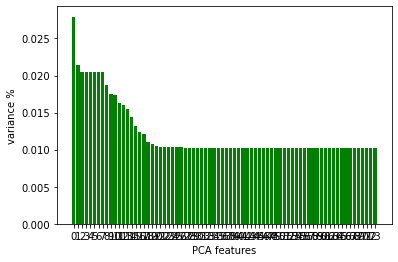

In [24]:
# Plot explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [25]:
# Number of features
len(df_crypto_pca.columns)

74

With 74 principal components, we have 90% of the information in the original dataset.

#### Further reduce the dataset dimensions with t-SNE

In [27]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [28]:
# Reduce dimensionsa and check that dimensions have been reduced to two
tsne_features = tsne.fit_transform(df_crypto_pca)
tsne_features.shape

(532, 2)

With t-SNE features are reduced to two. 

In [29]:
# The first column of transformed features
df_crypto_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_crypto_pca['y'] = tsne_features[:,1]

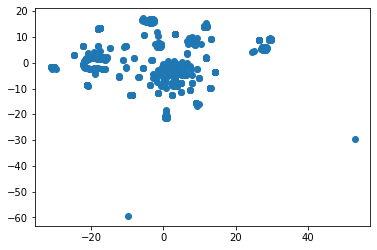

In [42]:
# Plot the results
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show()

### Cluster Analysis with k-Means

C:\Users\laure\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


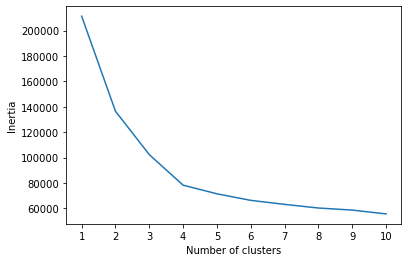

In [32]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values from 1-10
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [33]:
df_elbow.head(10) 

,k,inertia
0,1,211310.844095
1,2,136488.148821
2,3,102350.288917
3,4,78300.033219
4,5,71526.694998
5,6,66356.817272
6,7,63197.397569
7,8,60331.446047
8,9,58704.706123
9,10,55688.031500


Looking at the elbow curve, it appears 4 would be the best K value. After 4 clusters at (the elbow) the change in the value of inertia is no longer significant and most likely, neither is the variance of the rest of the data after the elbow point.

#### Predicting clusters with k=4

In [34]:
# Initializing k-means model
model = KMeans(n_clusters=4, random_state=42)

# Fitting the model
model.fit(df_crypto_pca)

# Predict clusters
predictions = model.predict(df_crypto_pca)

# Add the predicted class column to the dataframe
df_crypto_pca["class"] = model.labels_
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,x,y,class
0,-0.335099,1.032189,-0.590713,0.001397,8.903525e-15,3.715567e-12,-1.716189e-14,-0.007129,-1.319756,-0.051813,...,-3.661557e-15,1.430694e-15,5.554638e-16,-1.785268e-15,-4.465325e-15,5.623435e-15,1.495080e-16,-15.674072,1.760829,0
1,-0.318434,1.032331,-0.591126,0.001386,8.797456e-15,3.685202e-12,-1.704862e-14,-0.007739,-1.322514,-0.056674,...,-3.381113e-15,1.239842e-15,6.577914e-16,-2.151362e-15,-3.636457e-15,5.253594e-15,2.257183e-16,-20.568281,-2.303730,0
2,2.305468,1.656383,-0.683617,0.004731,1.292867e-14,1.259214e-11,-2.400344e-14,-0.054781,-1.542879,-0.943951,...,9.620581e-14,-3.895231e-14,-7.626327e-14,8.570577e-14,7.750666e-14,-1.176327e-13,-5.028292e-14,-29.607607,-2.346564,0
3,-0.145184,-1.320593,0.192813,-0.001229,-2.452485e-15,-3.268574e-12,4.249357e-15,-0.002071,0.281463,0.251862,...,9.069222e-15,-5.517559e-15,-1.035821e-14,9.738669e-15,1.904873e-14,-1.020151e-14,-3.457047e-15,28.566814,5.641003,1
4,-0.151768,-2.036192,0.396182,-0.001705,-1.119309e-14,-4.534708e-12,1.170787e-14,0.027735,0.519099,0.188820,...,-1.067494e-14,9.885849e-14,2.217027e-14,2.412023e-14,-5.247630e-14,3.685091e-14,-4.261416e-14,13.008230,-9.875749,3


In [35]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=42)
    # Train the model
    model.fit(data)
    # Predict clusters
    predictions = model.predict(data)
    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_
    return data

In [36]:
# Analyzing Clusters with the Best Value of k
clusters = get_clusters(4, df_crypto_pca)
clusters.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,x,y,class
0,-0.335099,1.032189,-0.590713,0.001397,8.903525e-15,3.715567e-12,-1.716189e-14,-0.007129,-1.319756,-0.051813,...,-3.661557e-15,1.430694e-15,5.554638e-16,-1.785268e-15,-4.465325e-15,5.623435e-15,1.495080e-16,-15.674072,1.760829,0
1,-0.318434,1.032331,-0.591126,0.001386,8.797456e-15,3.685202e-12,-1.704862e-14,-0.007739,-1.322514,-0.056674,...,-3.381113e-15,1.239842e-15,6.577914e-16,-2.151362e-15,-3.636457e-15,5.253594e-15,2.257183e-16,-20.568281,-2.303730,0
2,2.305468,1.656383,-0.683617,0.004731,1.292867e-14,1.259214e-11,-2.400344e-14,-0.054781,-1.542879,-0.943951,...,9.620581e-14,-3.895231e-14,-7.626327e-14,8.570577e-14,7.750666e-14,-1.176327e-13,-5.028292e-14,-29.607607,-2.346564,0
3,-0.145184,-1.320593,0.192813,-0.001229,-2.452485e-15,-3.268574e-12,4.249357e-15,-0.002071,0.281463,0.251862,...,9.069222e-15,-5.517559e-15,-1.035821e-14,9.738669e-15,1.904873e-14,-1.020151e-14,-3.457047e-15,28.566814,5.641003,2
4,-0.151768,-2.036192,0.396182,-0.001705,-1.119309e-14,-4.534708e-12,1.170787e-14,0.027735,0.519099,0.188820,...,-1.067494e-14,9.885849e-14,2.217027e-14,2.412023e-14,-5.247630e-14,3.685091e-14,-4.261416e-14,13.008230,-9.875749,3


In [37]:
# Visualize the clusters
def show_clusters(df):
    plt.scatter(df[0], df[1], c=df['class'])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

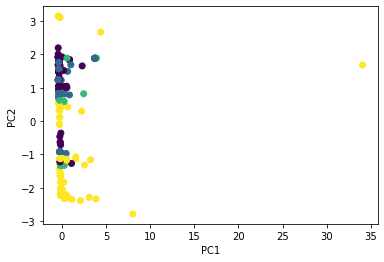

In [38]:
show_clusters(clusters) 

### Recommendation

Based on my findings, there is not a clear pattern of cryptocurrency clusters. Cryptocurrencies cannot be clustered together. 